- generative classification: modeling each class
- discriminative classification: find a line or curve or manifold that divides the classes from each other.
    

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

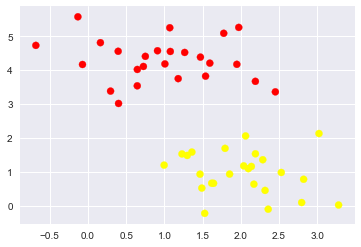

In [16]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.65)
plt.scatter(X[:,0], X[:,1], c=y,s=50, cmap='autumn')
plt.show()

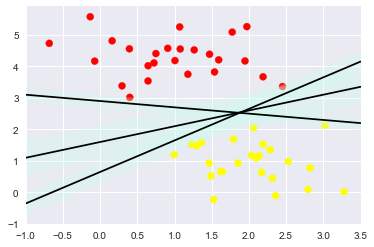

In [24]:
xfit = np.linspace(-1, 3.5)

plt.scatter(X[:,0], X[:,1], c=y,s=50, cmap='autumn')

for m , b, d in [(1,0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none', color='#CCFFEE', alpha=0.3)

plt.xlim(-1,3.5)
plt.show()

In [25]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
model.support_vectors_

array([[ 0.39920934,  3.01626962],
       [ 2.45161058,  3.35844964],
       [ 2.06209253,  2.05847948]])

In [33]:
def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors = 'k', 
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolor='none')
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

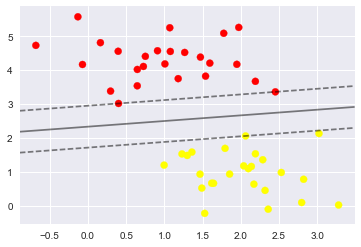

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [36]:
print(model.support_vectors_[:, 0])
print(model.support_vectors_[:, 1])

[ 0.39920934  2.45161058  2.06209253]
[ 3.01626962  3.35844964  2.05847948]


## Example: Face Recognition

In [ ]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

- For very large C, the margin is hard, and points cannot lie in it. For smaller C, the margin is softer, and can grow to encompass some points.